## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

In [1]:
# Random Choose Method to get optimal k* and *b
import random
import numpy as np

class FrameWork:
    def __init__(self,x,y):
        self.__y=y
        self.__x=x
        
    def __price(self,r,k,b):
        return k*r+b
    
    def __loss_func1(self,y,y_hat):
        return sum((y_i-y_hat_i)**2 for y_i,y_hat_i in zip(list(y),list(y_hat)))/len(list(self.__y))
    
    def __loss_func2(self,y,y_hat):
        return sum(abs(y_i-y_hat_i) for y_i,y_hat_i in zip(list(y),list(y_hat)))/len(list(self.__y))
    
    def calculation_random_choose(self,epoch,func_type='1'):
        least_lost=np.inf
        best_k=best_b=None
        for i in range(epoch):
            k=random.random() * 200 - 100
            b=random.random()*200-100
            predicted_price=[self.__price(r,k,b) for r in self.__x[:,5]]
            
            if func_type=='1':
                current_loss=self.__loss_func1(self.__y,predicted_price)
            elif func_type=='2':
                current_loss=self.__loss_func2(self.__y,predicted_price)
            else:
                raise TypeError('Wrong function type!')
                   
            if current_loss<least_lost:
                least_lost=current_loss
                best_k,best_b=k,b
                print('Epoch:%d, best k=%0.5f,best b=%0.5f, and loss=%0.5f' % (i,best_k,best_b,least_lost))
                
                
    def calculation_direction(self,epoch,learning_rate=0.001,func_type='1'):
        direction = [
            (+1, -1), 
            (+1, +1), 
            (-1, -1), 
            (-1, +1),
            ]
        min_loss=float(np.inf)
        best_k=random.random() * 200 - 100
        best_b=random.random() * 200 - 100
        next_direction=random.choice(direction)
        update_time=0
        
        for i in range(epoch):
    
            k_direction, b_direction = next_direction
    
            current_k, current_b = best_k + k_direction * learning_rate, best_b + b_direction * learning_rate
    
            price_by_k_and_b = [self.__price(r, current_k, current_b) for r in self.__x[:,5]]

            if func_type=='1':
                current_loss=self.__loss_func1(self.__y,price_by_k_and_b)
            elif func_type=='2':
                current_loss=self.__loss_func2(self.__y,price_by_k_and_b)
            else:
                raise TypeError('Wrong function type!')
    
            if current_loss < min_loss: # performance became better
                min_loss = current_loss
                best_k, best_b = current_k, current_b
        
                next_direction = next_direction
                update_time+=1
                
                if update_time%1000==0:
                    print('Epoch:%d, best k=%0.5f,best b=%0.5f, and loss=%0.5f' % (i,best_k,best_b,min_loss))
            else:
                next_direction = random.choice(direction)
                
                
    def calculation_gradirent(self,epoch,learning_rate=0.001,func_type='1'):
        min_loss=float(np.inf)
        current_k=random.random() * 200 - 100
        current_b=random.random() * 200 - 100
        
        def partial_k(x,y,y_hat):
            n=len(y)
            gradient=0
            for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
                gradient+=(y_i-y_hat_i)*x_i
                
                return -2/n*gradient
            
        def partial_b(x,y,y_hat):
            n=len(y)
            gradient=0
            for y_i,y_hat_i in zip(list(y),list(y_hat)):
                gradient+=(y_i-y_hat_i)
            return -2/n*gradient
        
        for i in range(epoch):
            predicted_price=[self.__price(r,current_k,current_b) for r in self.__x[:,5]]
            
            if func_type=='1':
                current_loss=self.__loss_func1(self.__y,predicted_price)
            elif func_type=='2':
                current_loss=self.__loss_func2(self.__y,predicted_price)
            else:
                raise TypeError('Wrong function type!')
            
            if current_loss <min_loss:
                min_loss=current_loss
                best_k,best_b=current_k,current_b
                
                if i % 1000==0:
                    print('Epoch:%d, best k=%0.5f,best b=%0.5f, and loss=%0.5f' % (i,best_k,best_b,min_loss))
            k_gra=partial_k(self.__x[:,5],self.__y,predicted_price)
            b_gra=partial_b(self.__x[:,5],self.__y,predicted_price)
            current_k=current_k+(-1*k_gra)*learning_rate
            current_b=current_b*(-1*b_gra)*learning_rate
                   
if __name__=='__main__':
    from sklearn.datasets import load_boston
    data = load_boston()
    x, y = data['data'], data['target']
    model=FrameWork(x,y)
    model.calculation_random_choose(100000,'2')
    print('-'*25+'华丽的分割线'+'-'*25)
    model.calculation_direction(100000,0.001,'2')
    print('-'*25+'华丽的分割线'+'-'*25)
    model.calculation_gradirent(100000,0.001,'2')
    

Epoch:0, best k=-43.72870,best b=-96.57591, and loss=393.92761
Epoch:2, best k=-29.67109,best b=58.29449, and loss=150.71026
Epoch:5, best k=-29.79073,best b=97.69869, and loss=112.05798
Epoch:9, best k=-12.50040,best b=71.01241, and loss=30.20528
Epoch:27, best k=6.32430,best b=-36.84748, and loss=19.63440
Epoch:37, best k=4.75120,best b=-21.19801, and loss=13.92868
Epoch:137, best k=17.53175,best b=-91.43676, and loss=6.95797
Epoch:526, best k=17.99614,best b=-88.42424, and loss=6.52792
Epoch:594, best k=10.44585,best b=-42.57837, and loss=4.45939
Epoch:31805, best k=9.79486,best b=-38.63609, and loss=4.43985
-------------------------华丽的分割线-------------------------
Epoch:999, best k=-96.00016,best b=-18.78215, and loss=644.64084
Epoch:1999, best k=-95.00016,best b=-17.78215, and loss=637.35620
Epoch:2999, best k=-94.00016,best b=-16.78215, and loss=630.07157
Epoch:3999, best k=-93.00016,best b=-15.78215, and loss=622.78693
Epoch:4999, best k=-92.00016,best b=-14.78215, and loss=615.5

Epoch:19000, best k=4.60483,best b=-0.00000, and loss=8.29832
Epoch:20000, best k=4.45488,best b=-0.00000, and loss=7.68466
Epoch:21000, best k=4.32847,best b=-0.00000, and loss=7.21137
Epoch:22000, best k=4.22193,best b=-0.00000, and loss=6.84371
Epoch:23000, best k=4.13212,best b=-0.00000, and loss=6.55078
Epoch:24000, best k=4.05641,best b=-0.00000, and loss=6.32171
Epoch:25000, best k=3.99260,best b=-0.00000, and loss=6.14462
Epoch:26000, best k=3.93882,best b=-0.00000, and loss=6.00423
Epoch:27000, best k=3.89348,best b=-0.00000, and loss=5.89204
Epoch:28000, best k=3.85526,best b=-0.00000, and loss=5.80733
Epoch:29000, best k=3.82305,best b=-0.00000, and loss=5.74343
Epoch:30000, best k=3.79590,best b=-0.00000, and loss=5.69372
Epoch:31000, best k=3.77301,best b=-0.00000, and loss=5.65361
Epoch:32000, best k=3.75372,best b=-0.00000, and loss=5.62185
Epoch:33000, best k=3.73745,best b=-0.00000, and loss=5.59665
Epoch:34000, best k=3.72375,best b=-0.00000, and loss=5.57745
Epoch:35

### Part 3: Finish the Solution Parse Part of Edit-Distance

In [64]:
solution = {}
#@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))
    candidates.append(both_forward)
    min_distance, operation = min(candidates, key=lambda x: x[0])
    solution[(string1, string2)] = operation 
    
    return min_distance

# 解析方案
def parse_solution(original_string,target_string, revenue_solution,original_len=1,target_len=1):
    pass
#     if (original_string[:original_len],target_string[:target_len] not in \
#                         list(set(revenue_solution.keys())):
#         raise ('Words are not in the solution!')
#     if target_len>len(target_string):
#         return
#     print(revenue_solution[(original_string[:original_len])])
        

edit_distance('ABCEF', 'ABCDEFG')
    
   

2

In [85]:
def parse_solution(str1,str2,solution,len1=1,len2=1):
    if len(str1)==0 or len(str2)==0:
        raise ValueError('str1 or str2 length cannot be 0!')
    if len(str1)==1:
        if len2>len(str2):
            return
        print(solution[(str1,str2[:len2])])
        return parse_solution(str1,str2,solution,len1,len2+1)
    elif len(str1)<=len(str2):
        if len2>len(str2):
            return
        if str1[:len1]==str2[:len2]:
            return parse_solution(str1,str2,solution,len1+1,len2+1)
        else:
            if len1<len(str1):
                print(solution[(str1[:len1],str2[:len2])])
                return parse_solution(str1,str2,solution,len1+1,len2+1)
            else:
                print(solution[(str1[:len1],str2[:len2])])
                return parse_solution(str1,str2,solution,len1,len2+1)
    else:
        if len1>len(str1):
            return
        if str1[:len1]==str2[:len2]:
            return parse_solution(str1,str2,solution,len1+1,len2+1)
        else:
            if len2<len(str2):
                print(solution[(str1[:len1],str2[:len2])])
                return parse_solution(str1,str2,solution,len1+1,len2+1)
            else:
                print(solution[(str1[:len1],str2[:len2])])
                return parse_solution(str1,str2,solution,len1,len2+1)

In [84]:
 parse_solution('ABCEF', 'ABCDEFG',solution)

SUB E => D
DEL F

ADD G


In [65]:
solution

{('A', 'A'): '',
 ('A', 'AB'): 'ADD B',
 ('A', 'ABC'): 'ADD C',
 ('A', 'ABCD'): 'ADD D',
 ('A', 'ABCDE'): 'ADD E',
 ('A', 'ABCDEF'): 'ADD F',
 ('A', 'ABCDEFG'): 'ADD G',
 ('AB', 'A'): 'DEL B',
 ('AB', 'AB'): '',
 ('AB', 'ABC'): 'ADD C',
 ('AB', 'ABCD'): 'ADD D',
 ('AB', 'ABCDE'): 'ADD E',
 ('AB', 'ABCDEF'): 'ADD F',
 ('AB', 'ABCDEFG'): 'ADD G',
 ('ABC', 'A'): 'DEL C',
 ('ABC', 'AB'): 'DEL C',
 ('ABC', 'ABC'): '',
 ('ABC', 'ABCD'): 'ADD D',
 ('ABC', 'ABCDE'): 'ADD E',
 ('ABC', 'ABCDEF'): 'ADD F',
 ('ABC', 'ABCDEFG'): 'ADD G',
 ('ABCE', 'A'): 'DEL E',
 ('ABCE', 'AB'): 'DEL E',
 ('ABCE', 'ABC'): 'DEL E',
 ('ABCE', 'ABCD'): 'SUB E => D',
 ('ABCE', 'ABCDE'): '',
 ('ABCE', 'ABCDEF'): 'ADD F',
 ('ABCE', 'ABCDEFG'): 'ADD G',
 ('ABCEF', 'A'): 'DEL F',
 ('ABCEF', 'AB'): 'DEL F',
 ('ABCEF', 'ABC'): 'DEL F',
 ('ABCEF', 'ABCD'): 'DEL F',
 ('ABCEF', 'ABCDE'): 'DEL F',
 ('ABCEF', 'ABCDEF'): '',
 ('ABCEF', 'ABCDEFG'): 'ADD G'}

In [33]:
# 替代方案
def Edit_Distance(str1, str2):
    """
    计算字符串 str1 和 str2 的编辑距离
    :param str1
    :param str2
    :return:
    """
    matrix = [[ i + j for j in range(len(str2) + 1)] for i in range(len(str1) + 1)]
    
    for i in range(len(str1)):
        matrix[i][0]=i
    for j in range(len(str2)):
        matrix[0][j]=j

    for i in range(1, len(str1)+1):
        for j in range(1, len(str2)+1):
            if(str1[i-1] == str2[j-1]):
                d = 0
            else:
                d = 1

            matrix[i][j] = min(matrix[i-1][j]+1, matrix[i][j-1]+1, matrix[i-1][j-1]+d)

    return matrix[len(str1)][len(str2)],matrix



distance,matrix=Edit_Distance("abc", "bd")

In [50]:
distance,matrix=Edit_Distance('JKLSUE', 'EJFUIEL')
distance

6

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶

Ans:Ans:In order to find global/local optimilising value if its gradient has the same direction with its derivative on parameters within a fastest way which we call it as supversied method.

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans:Gredient is the changing rate of a variable on its forward direction, and 'descent' means that reduction of error value with recursion.


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans:
1. It could help to find global/local minminum value within fastest speed and correct direction.
2. Cooperating with learning_rate to control whole calculating procedure in order to find a most accurate result.

4. Using the simple words to describe: What's the machine leanring.¶

Ans: Using statical and mathematical model/theory to simulate human being's thinking in order to resolve complex problems.

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

Answer:

As DP method can store sub-question solutions during its calculating procudures which would be useful to find detailed sequence as a global result for every step.

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

Answer:

In the statistic section, we have a quiet famous role that Occam's Razor. As some of machine learning methods need a large amount of time where they will have to cost much more time than using simple algorithms. Dynamic programming is one of simple ones. We therefore mainly rely on this method to resolve some problems with quick way.

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

Answer:
1. The question that is recursively solved by sub-questions need more memories on PC;
2. If we do not set a stop condition, we then could see a cycle forever;
3. Speey sometimes would be slowly.

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

Answer:
1. Map searching for destination with different starting points;
2. Predicting next word or set of words by previous specific setence or words;
3. Gene detection 

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

Answer:
1. Parent problem can be solved by different sub-question-->It means that we can use reversion method;
2. Every result could be a minimum local value-->Make sure that every step could get optimum value;
3. Every sub-question will be calculated one by one--> Result of last sub-question would be whole question's answer.

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

Answer:
1. There is no standard models we can simulate;
2. It could see Dimension explosion when sequence is quiet large.

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

给定一个初始点 𝑃, 已经有𝑘个车辆，如何从该点出发，经这 k 个车辆经过所有的点全部一次，而且所走过的路程最短?

例如：

个人版动态规划解决方案

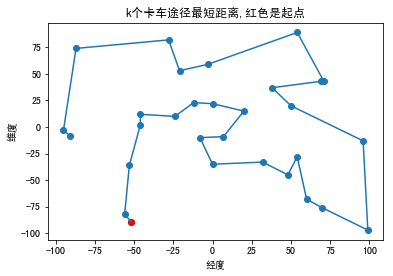

In [72]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
import random
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


class Solution:
    def __init__(self,length):
        self.__latitudes = [random.randint(-100, 100) for _ in range(length)]
        self.__longitude = [random.randint(-100, 100) for _ in range(length)]
        self.__locations=[(x,y) for x,y in zip(self.__latitudes,self.__longitude)]
        self.__location_cities={}
        for i in range(len(self.__locations)):
            self.__location_cities[i]=self.__locations[i]
        self.__copy_location_cities=deepcopy(self.__location_cities)

    def __cal_distance(self,x,y):
        return np.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2)

    def distance(self,start):
        # 返回指定点到其它点的最短距离
        start_to_other={}
        for i in list(set(self.__location_cities.keys())):
            if i==start:
                continue
            start_to_other[i]=self.__cal_distance(self.__location_cities[start],
                                                  self.__location_cities[i])
        min_distance=sorted(start_to_other.items(),key=lambda x:x[1])[0]
        return min_distance
    
    def inline(self,start):
        next_point=None
        if  len(list(self.__location_cities.keys()))==1:
            return shortest_path
        else:
            if start not in visited_point:
                # 将当前节点直接放入记录已遍历节点的列表
                visited_point.append(start)
                # 计算距离
                min_distance=self.distance(start)
                delete=self.__location_cities.pop(start)
                shortest_path[start]=min_distance[-1]
                next_point=min_distance[0]
                return self.inline(next_point)
            else:
                next_point=shortest_path[start][0]
                return self.inline(next_point)
            
    def plot_path(self,shortest_path):
        final_path=[]
        for key in list(shortest_path.keys()):
            final_path.append(self.__copy_location_cities[key])
        # 将没办法计算的终点搜寻并加入到最短路径表中
        last_point=[x for x in list(self.__copy_location_cities.keys()) \
                    if x not in list(shortest_path.keys())]
        final_path.append(self.__copy_location_cities[last_point.pop(-1)])
        x=[x[0] for x in final_path]
        y=[y[-1] for y in final_path]
        plt.scatter(x, y)
        plt.scatter(x[0],y[0],color='r')
        plt.plot(x,y)
        plt.xlabel('经度')
        plt.ylabel('维度')
        plt.title('k个卡车途径最短距离,红色是起点')
            
visited_point=[]
shortest_path={}
model=Solution(30)
shortest_path=model.inline(5)
model.plot_path(shortest_path)


In [4]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

In [5]:
import matplotlib.pyplot as plt

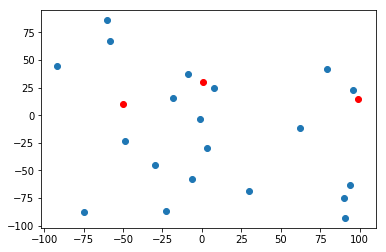

In [6]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

shuro